In [1]:
import torch, torch_geometric
from src import graph_initialization, embedding
from src.graphCNN import GraphCNN
import networkx as nx
from torch_geometric.nn import GCNConv,Sequential,PositionalEncoding
from torch import nn


In [2]:
converter=graph_initialization.text_to_graph()
batches=converter(["Hello world! good i saw you", "How are you?"])


In [55]:
data=batches.get_example(0)
x=data.x
print(x.shape)
s,f=data['edge_index']
f[s==0]
print(f[s==0])
torch.index_select(x,0,f[s==0]).shape

torch.Size([9, 1])
tensor([1, 3, 4, 5, 8])


torch.Size([5, 1])

In [4]:
#x=torch.rand([4,8]).float()
#p_encoding=PositionalEncoding(10)
#print(x.shape,p_encoding(x).shape)
#.einsum(x,p_encoding(x),'c l, l c -> c l')

embedding_f=embedding.InputEmbedding()

x=embedding_f(x)

x.shape


torch.Size([9, 512])

In [6]:


#x=torch.rand([4,8]).float()
#p_encoding=PositionalEncoding(10)
#print(x.shape,p_encoding(x).shape)
#.einsum(x,p_encoding(x),'c l, l c -> c l')

embedding_f=embedding.InputEmbedding()

x=embedding_f(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x8 and 1x2048)

In [6]:
x.shape

torch.Size([4, 8, 512])

In [6]:
x=torch.rand([10,1,7])
lin=nn.Sequential(nn.Conv1d(1,5,1),nn.ReLU(),nn.Conv1d(5,20,1))
lin(x).shape


torch.Size([10, 20, 7])

# simple graph example

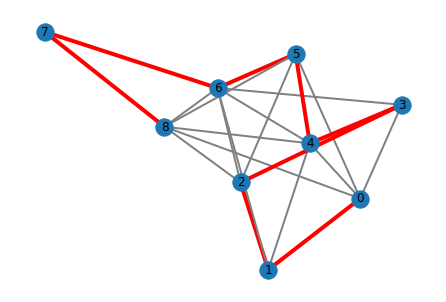

In [56]:
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

#update_f=GraphCNN(features)

In [126]:
type(data)

torch_geometric.data.data.Data

In [12]:
type(data)

torch_geometric.data.data.Data

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [7]:
tokens=tokenizer(["Hello world! good i saw you", "How are you?"])
tokens['input_ids']

[[101, 8667, 1362, 106, 1363, 178, 1486, 1128, 102],
 [101, 1731, 1132, 1128, 136, 102]]

In [119]:
tokens,mask=tokens['input_ids'],tokens['attention_mask']

ValueError: expected sequence of length 9 at dim 1 (got 6)

In [117]:
for i in range(len(tokens)):
    limit=sum(mask[i])
    tokens[i]=torch.tensor(tokens[i][:limit])
tokens

[tensor([ 101, 8667, 1362,  106, 1363,  178, 1486, 1128,  102]),
 tensor([ 101, 1731, 1132, 1128,  136,  102])]

In [64]:
a=torch.tensor([[1,2,6],[4,1,6]])
b=torch.tensor([[0,1,0],[1,0,1]]).bool()

a[0]=a[0,:-1]
#for i in range(a.shape[0]):
    #a[i]=a[i][b[i]]
a

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 0.  Target sizes: [3].  Tensor sizes: [2]

In [58]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [132]:
class text_to_graph():

    def __init__(self,
                tokenizer=AutoTokenizer.from_pretrained("bert-base-cased"),
                seq_to_graph=graphCA.sequence_to_random_graph):
                
        self.tokenizer=tokenizer
        self.seq_to_graph=seq_to_graph
    
    def __call__(self,text:list)->torch.Tensor:

        tokens=self.tokenizer(text)['input_ids']
        graphs= [self.seq_to_graph(torch.tensor(token)) for token in tokens]
        
        return torch_geometric.data.Batch.from_data_list(graphs)


In [149]:
batches.get_example(1)

Data(x=[6], edge_index=[2, 28])

In [87]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer.vocab_size

#tok=tokenizer(["Hello world! good i saw you", "How are you?"]).input_ids

28996

In [86]:
embedder=nn.Embedding(tokenizer.vocab_size, 10)

embedder(torch.LongTensor(tok[0]))

tensor([[ 1.1367, -0.5440, -1.1365, -0.5710,  0.6125, -1.2702,  1.1930, -1.1238,
         -2.0695,  1.4263],
        [-0.4581, -0.3035,  0.8398, -0.1022, -0.5462, -0.0551, -0.3629,  0.9409,
          0.6853,  0.6864],
        [-0.1399,  1.2388,  1.0091, -1.3244, -1.6316, -0.3881,  0.2095, -0.0254,
          0.9226,  0.5774],
        [ 2.7878,  0.1155, -1.4034,  0.3135,  0.4956, -1.5424,  0.7121, -0.4498,
         -0.6385, -0.6773],
        [ 0.9257, -0.9953, -0.0751, -0.0363,  1.0942,  0.4953, -0.5974,  0.2871,
         -0.1428,  0.4920],
        [ 0.1651, -1.0538, -0.5875,  0.0089,  0.3929, -0.7140,  1.1768, -0.1032,
         -1.1596,  0.2293],
        [ 0.2666,  2.8666, -0.1871, -0.6620,  0.4861, -0.1503, -0.2693,  0.2618,
          0.5441,  0.1129],
        [ 0.5448,  0.0276,  1.8743, -0.8274, -0.9595,  1.4980,  0.9661,  0.2119,
          0.2512,  0.9078],
        [-0.2412, -0.4170, -0.3209,  0.2445, -0.2582, -0.3934,  1.3737, -0.8061,
          0.4297,  2.1447]], grad_fn=<Embedding